In [2]:
import pandas 
import seaborn
import matplotlib.pyplot as plt 
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipotle_data = pandas.read_csv(url, sep= "\t")
chipotle_data.head(20)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [3]:
chipotle_data.info()
chipotle_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [4]:
chipotle_data.columns

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')

In [5]:
chipotle_data.shape

(4622, 5)

In [6]:
unique_items = chipotle_data.groupby("item_name").sum()
items_quantity= unique_items["quantity"]
most_ordered_quantity = items_quantity.max()
print("Mos ordered quantity:", most_ordered_quantity)
most_ordered_item = items_quantity.idxmax()
print("Most ordered Item: ", most_ordered_item)


Mos ordered quantity: 761
Most ordered Item:  Chicken Bowl


In [7]:
chipotle_data["item_price_pr"] = chipotle_data["item_price"].str.replace("$", "").astype(float)
revenue = (chipotle_data["item_price_pr"] * chipotle_data["quantity"]).sum()
print(revenue)

39237.02


In [8]:
## get number of unique order_id entries
chipotle_data["order_id"].nunique()

1834

In [9]:
# access items that cost more than $10 in the "item_price_pr" column
list_items_over_10 = chipotle_data[chipotle_data["item_price_pr"] > 10]

## get size of list to get number of items that cost more than $10
n_items_over_10 = list_items_over_10.shape[0]
print("Number of items that cost more than $10:")
print(n_items_over_10)

Number of items that cost more than $10:
1130


In [10]:
## access item_name column to get item names
## and return unique values using unique() method
unique_item_names = chipotle_data["item_name"].unique()
for name in unique_item_names:
    print(name)

Chips and Fresh Tomato Salsa
Izze
Nantucket Nectar
Chips and Tomatillo-Green Chili Salsa
Chicken Bowl
Side of Chips
Steak Burrito
Steak Soft Tacos
Chips and Guacamole
Chicken Crispy Tacos
Chicken Soft Tacos
Chicken Burrito
Canned Soda
Barbacoa Burrito
Carnitas Burrito
Carnitas Bowl
Bottled Water
Chips and Tomatillo Green Chili Salsa
Barbacoa Bowl
Chips
Chicken Salad Bowl
Steak Bowl
Barbacoa Soft Tacos
Veggie Burrito
Veggie Bowl
Steak Crispy Tacos
Chips and Tomatillo Red Chili Salsa
Barbacoa Crispy Tacos
Veggie Salad Bowl
Chips and Roasted Chili-Corn Salsa
Chips and Roasted Chili Corn Salsa
Carnitas Soft Tacos
Chicken Salad
Canned Soft Drink
Steak Salad Bowl
6 Pack Soft Drink
Chips and Tomatillo-Red Chili Salsa
Bowl
Burrito
Crispy Tacos
Carnitas Crispy Tacos
Steak Salad
Chips and Mild Fresh Tomato Salsa
Veggie Soft Tacos
Carnitas Salad Bowl
Barbacoa Salad Bowl
Salad
Veggie Crispy Tacos
Veggie Salad
Carnitas Salad


/var/folders/qd/_mn5016x7tj8t2z1f65m23yh0000gn/T/ipykernel_3577/2110693464.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seaborn.barplot(top_5_items, palette="deep")


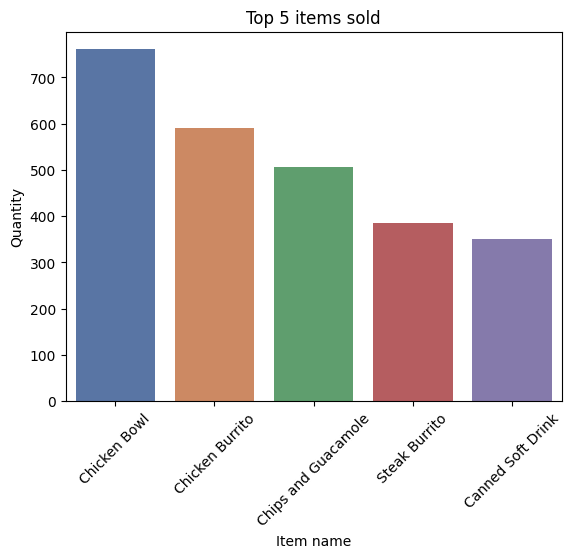

In [17]:
# unique_items = chipotle_data.groupby("item_name").sum()
# items_quantity= unique_items["quantity"]

## top 5 items based on quantity
top_5_items = items_quantity.nlargest(5)
## create a bar graph using seaborn
seaborn.barplot(top_5_items, palette="deep")
## set x axis label and y labels
plt.xlabel("Item name")
plt.ylabel("Quantity")
# set title of graph
plt.title("Top 5 items sold")
## rotate x axis labels 45 degrees to fix crowding
plt.xticks(rotation=45)
plt.show()

In [ ]:
## 9.Create a pie chart showing the number of times each of the top 10 items were ordered.
## top 10 items: based on quantity

In [ ]:
## 10.Create a line graph showing how much money was spent on the top 10 items ordered.
## same as above top 10 items